In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
epl_df = pd.read_csv('./EPL_Soccer_MLR_LR.csv')
epl_df.head()

,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64


In [3]:
epl_df.shape

(202, 13)

In [4]:
# check for null values
epl_df.isnull().sum()

PlayerName                0
Club                      0
DistanceCovered(InKms)    0
Goals                     0
MinutestoGoalRatio        0
ShotsPerGame              0
AgentCharges              0
BMI                       0
Cost                      0
PreviousClubCost          0
Height                    0
Weight                    0
Score                     0
dtype: int64

No missing values

In [5]:
# check data types present
epl_df.dtypes

PlayerName                 object
Club                       object
DistanceCovered(InKms)    float64
Goals                     float64
MinutestoGoalRatio        float64
ShotsPerGame              float64
AgentCharges                int64
BMI                       float64
Cost                      float64
PreviousClubCost          float64
Height                    float64
Weight                    float64
Score                     float64
dtype: object

Data types seem to be fine

In [6]:
epl_df.describe()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


In [7]:
epl_df.corr()

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


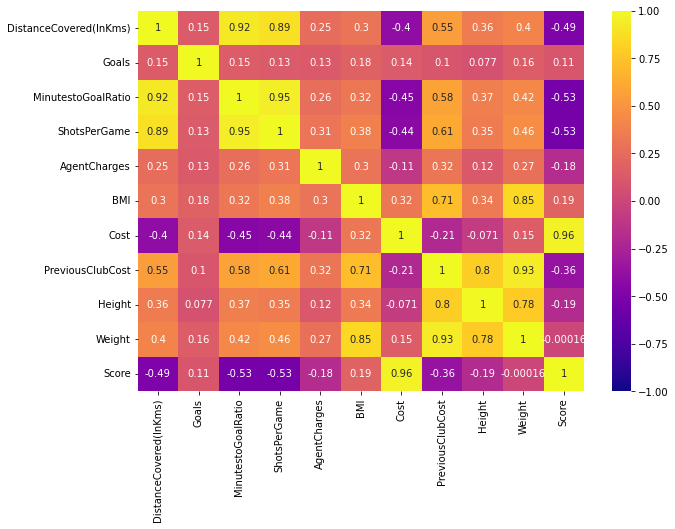

In [18]:
plt.figure(figsize=(10,7))

corr = epl_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(epl_df.corr(), annot=True, vmax=1, vmin=-1, cmap='plasma');

**Height and Weight** seem to be correlated and so does **MinutestoGoalRatio and ShotsPerGame**

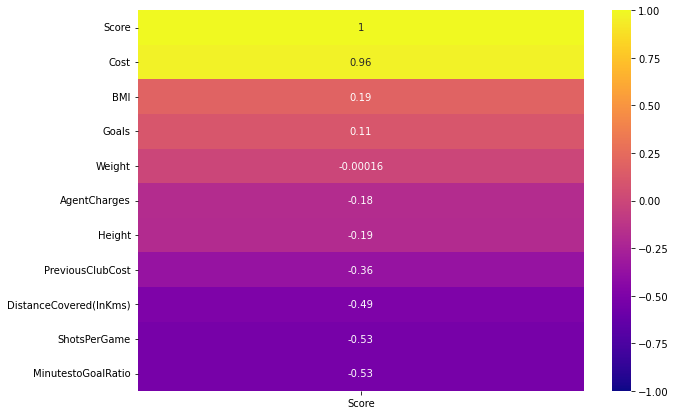

In [28]:
plt.figure(figsize=(10,7))
sns.heatmap(epl_df.corr()[['Score']].sort_values(by='Score', ascending=False), annot=True, vmax=1, vmin=-1, center=0, cmap='plasma');

Discard height and weight

In [27]:
epl_df.columns

Index(['PlayerName', 'Club', 'DistanceCovered(InKms)', 'Goals',
       'MinutestoGoalRatio', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost',
       'PreviousClubCost', 'Height', 'Weight', 'Score'],
      dtype='object')

In [30]:
# Extract predictor variables, remove categorical variables like Club
X = epl_df[['DistanceCovered(InKms)', 'Goals', 'ShotsPerGame', 'AgentCharges', 'BMI', 'Cost', 'PreviousClubCost']]
y = epl_df['Score']

In [31]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [32]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((151, 7), (151,), (51, 7), (51,))

In [33]:
# forcing the intercept term
X_train_with_intercept = sm.add_constant(X_train)

# instantiating and fitting the model
lr = sm.OLS(y_train, X_train_with_intercept).fit()

In [34]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     476.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):           9.69e-96
Time:                        05:20:00   Log-Likelihood:                -252.91
No. Observations:                 151   AIC:                             521.8
Df Residuals:                     143   BIC:                             546.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2052      1.601      5.750      0.000       6.041      12.370
DistanceCovered(InKms)    -0.6790      0.563     -1.206      0.230      -1.792       0.434
Goals                      0.0279      0.060      0.464      0.643      -0.091       0.147
ShotsPerGame              -0.1151      0.191     -0.601      0.548      -0.493       0.263
AgentCharges              -0.0023      0.002     -0.939      0.349      -0.007       0.003
BMI                        0.1841      0.077      2.386      0.018       0.032       0.337
Cost                       0.1612      0.005     31.297      0.000       0.151       0.171
PreviousClubCost          -0.0953      0.017     -5.772      0.000      -0.128      -0.063
==============================================================================
Omnibus:                        7.786   Durbin-Watson:                   1.920
Prob(Omnibus):                  0.020   Jarque-Bera (JB):                7.830
Skew:                           0.444   Prob(JB):                       0.0199
Kurtosis:                       3.675   Cond. No.                     1.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# trimming the predictor variables
X = epl_df[['DistanceCovered(InKms)', 'BMI', 'Cost', 'PreviousClubCost']]

In [36]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [37]:
# adding intercept term
X_train_with_intercept = sm.add_constant(X_train)

# instantiating and fitting the model
lr = sm.OLS(y_train, X_train_with_intercept).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.959
Model:                            OLS   Adj. R-squared:                  0.957
Method:                 Least Squares   F-statistic:                     843.0
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          9.28e-100
Time:                        05:24:48   Log-Likelihood:                -253.64
No. Observations:                 151   AIC:                             517.3
Df Residuals:                     146   BIC:                             532.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      9.2171      1.548      5.955      0.000       6.158      12.276
DistanceCovered(InKms)    -0.9395      0.323     -2.905      0.004      -1.579      -0.300
BMI                        0.1629      0.074      2.200      0.029       0.017       0.309
Cost                       0.1628      0.005     33.617      0.000       0.153       0.172
PreviousClubCost          -0.0961      0.016     -5.861      0.000      -0.129      -0.064
==============================================================================
Omnibus:                        7.362   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.506
Skew:                           0.412   Prob(JB):                       0.0234
Kurtosis:                       3.717   Cond. No.                     1.50e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R2 score is the same, but the AIC and BIC have reduced

In [38]:
# adding club
epl_df['Club'].value_counts()

CHE    78
LIV    65
MUN    59
Name: Club, dtype: int64

In [39]:
cat_features = pd.get_dummies(epl_df['Club'])
cat_features

,CHE,LIV,MUN
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
197,0,1,0
198,0,1,0
199,0,1,0
200,0,1,0


In [40]:
df_encoded = pd.concat([cat_features, epl_df], axis=1)
df_encoded

,CHE,LIV,MUN,PlayerName,Club,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
0,0,0,1,"Braund, Mr. Owen Harris",MUN,3.96,7.5,37.5,12.3,60,20.56,109.1,63.32,195.9,78.9,19.75
1,0,0,1,"Allen, Mr. William Henry",MUN,4.41,8.3,38.2,12.7,68,20.67,102.8,58.55,189.7,74.4,21.30
2,0,0,1,"Moran, Mr. James",MUN,4.14,5.0,36.4,11.6,21,21.86,104.6,55.36,177.8,69.1,19.88
3,0,0,1,"McCarthy, Mr. Timothy J",MUN,4.11,5.3,37.3,12.6,69,21.88,126.4,57.18,185.0,74.9,23.66
4,0,0,1,"Palsson, Master. Gosta Leonard",MUN,4.45,6.8,41.5,14.0,29,18.96,80.3,53.20,184.6,64.6,17.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,0,1,0,"Ryan, Mr. Patrick",LIV,4.90,7.6,45.6,16.0,90,27.56,67.2,82.00,183.9,93.2,11.79
198,0,1,0,"Saad, Mr. Amin",LIV,5.66,8.3,50.2,17.7,38,23.76,56.5,72.00,183.5,80.0,10.05
199,0,1,0,"Saad, Mr. Khalil",LIV,5.03,6.4,42.7,14.3,122,22.01,47.6,68.00,183.1,73.8,8.51
200,0,1,0,"Saade, Mr. Jean Nassr",LIV,4.97,8.8,43.0,14.9,233,22.34,60.4,63.00,178.4,71.1,11.50


In [45]:
# adding club
X = df_encoded[['DistanceCovered(InKms)', 'BMI', 'Cost', 'PreviousClubCost', 'CHE', 'LIV', 'MUN']]

In [46]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [47]:
# add intercept term
X_train_with_intercept = sm.add_constant(X_train)

# instantiate and fit the model
lr = sm.OLS(y_train, X_train_with_intercept).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     691.4
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          1.79e-103
Time:                        05:43:34   Log-Likelihood:                -237.58
No. Observations:                 151   AIC:                             489.2
Df Residuals:                     144   BIC:                             510.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      3.9020      1.180      3.306      0.001       1.569       6.235
DistanceCovered(InKms)    -0.3125      0.316     -0.989      0.324      -0.937       0.312
BMI                        0.2677      0.070      3.826      0.000       0.129       0.406
Cost                       0.1459      0.005     27.435      0.000       0.135       0.156
PreviousClubCost          -0.0984      0.015     -6.578      0.000      -0.128      -0.069
CHE                        0.9915      0.424      2.336      0.021       0.153       1.830
LIV                        0.3328      0.510      0.652      0.515      -0.676       1.341
MUN                        2.5777      0.363      7.109      0.000       1.861       3.294
==============================================================================
Omnibus:                        2.294   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.318   Jarque-Bera (JB):                1.891
Skew:                           0.260   Prob(JB):                        0.389
Kurtosis:                       3.174   Cond. No.                     4.06e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.62e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

The R2 score has slightly increased and both the AIC and BIC have decreased, so far this seems to be the best model

In [48]:
# testing data
X_test_with_intercept = sm.add_constant(X_test)

y_preds = lr.predict(X_test_with_intercept)

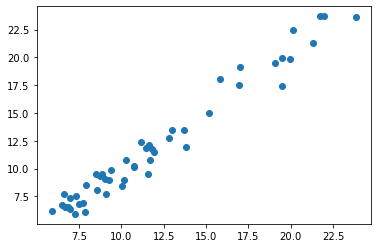

In [54]:
plt.scatter(y_preds, y_test);


In [67]:
# adding Goals
X = df_encoded[['BMI', 'Cost', 'PreviousClubCost', 'CHE', 'MUN']]

In [68]:
# splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)

In [69]:
# add intercept term
X_train_with_intercept = sm.add_constant(X_train)

# instantiate and fit the model
lr = sm.OLS(y_train, X_train_with_intercept).fit()

lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     829.6
Date:                Tue, 05 Jul 2022   Prob (F-statistic):          9.58e-105
Time:                        05:53:58   Log-Likelihood:                -238.09
No. Observations:                 151   AIC:                             488.2
Df Residuals:                     145   BIC:                             506.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                2.8636      0.929      3.081      0.002       1.027       4.701
BMI                  0.2684      0.070      3.836      0.000       0.130       0.407
Cost                 0.1463      0.005     27.632      0.000       0.136       0.157
PreviousClubCost    -0.1018      0.015     -6.991      0.000      -0.131      -0.073
CHE                  0.7335      0.251      2.920      0.004       0.237       1.230
MUN                  2.3854      0.364      6.546      0.000       1.665       3.106
==============================================================================
Omnibus:                        2.257   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.323   Jarque-Bera (JB):                1.921
Skew:                           0.271   Prob(JB):                        0.383
Kurtosis:                       3.112   Cond. No.                     1.00e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""